In [1]:
%load_ext autoreload
%autoreload 2

from pangolin.interface import *
from pangolin import new_infer as infer
import numpy as np

In [2]:
# some simple data
num_groups = 3
num_data = 100

# fixed data
x = np.random.randn(num_data)

# define model
mu = normal_scale(0,100) # shared mean
sigma = normal_scale(0,10)**2 # shared scale
beta = plate(N=num_groups)(lambda: normal_scale(mu,sigma))

infer.sample((mu,sigma,beta),niter=1)


skipping MCMC...


(Array([-44.818176], dtype=float32),
 Array([435.5859], dtype=float32),
 Array([[-906.0872,  303.1265,  657.3798]], dtype=float32))

In [3]:
x = makerv([.1,.2,.7])

In [4]:
x[0]

RV(Index(slices=(None,)), parents=[RV(Constant([0.1,0.2,0.7])),RV(Constant(0))])

In [5]:
x = np.array([0.0,1.1,2.2,3.3,4.4,5.5])
x[[0,0,3,2]]

array([0. , 0. , 3.3, 2.2])

In [6]:
x = np.reshape(np.arange(0,10,.1),[10,10])
x

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9],
       [3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9],
       [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9],
       [5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9],
       [6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9],
       [7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9],
       [8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9],
       [9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]])

In [7]:
x[[0,0,2],[0,1,2]]

array([0. , 0.1, 2.2])

In [8]:
x = np.reshape(np.arange(0,10,.1),[10,10])[:4,:4]
idx0 = np.array([[0,0],[1,1]])
idx1 = np.array([[0,1],[0,1]])
y = x[idx0,idx1]
z = np.array([[x[idx0[i,j],idx1[i,j]] for j in range(2)] for i in range(2)])

print(f"{x=}")
print(f"{y=}")
print(f"{z=}")

x=array([[0. , 0.1, 0.2, 0.3],
       [1. , 1.1, 1.2, 1.3],
       [2. , 2.1, 2.2, 2.3],
       [3. , 3.1, 3.2, 3.3]])
y=array([[0. , 0.1],
       [1. , 1.1]])
z=array([[0. , 0.1],
       [1. , 1.1]])


In [9]:
z.shape

(2, 2)

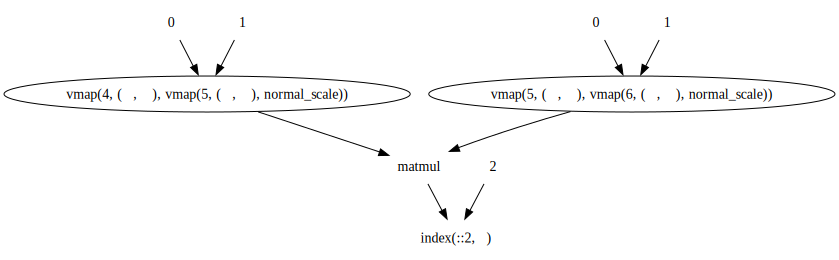

skipping MCMC...


(100, 2)

In [21]:
x = plate(N=4)(lambda:
               plate(N=5)(lambda:
                          normal_scale(0,1)))
y = plate(N=5)(lambda:
               plate(N=6)(lambda:
                          normal_scale(0,1)))

z = x @ y

u = z[::2,2]

display(viz_upstream(u))

us = infer.sample(u, niter=100)
us.shape